In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
df.drop_duplicates(inplace=True)
df.head()


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [10]:
df.drop(['Q1',	'Q2',	'Q3',	'Q4',	'Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18'	,	'Q19',	'Q20',	'Q21',	'Q22',	'Q23',	'Q24',	'Q25',	'Q26',	'Q27',	'Q28'], axis=1, inplace=True)
df.head()

,instr,class,nb.repeat,attendance,difficulty
0,1,2,1,0,4
1,1,2,1,1,3
2,1,2,1,2,4
4,1,2,1,0,1
5,1,2,1,3,3


In [22]:
mean_of_repeater = df['nb.repeat'].mean()
print(mean_of_repeater)






1.267789791299975


In [20]:
median_of_repeater = df['nb.repeat'].median()
median_of_repeater

1.0

In [21]:
st_deviation_of_repeater = df['nb.repeat'].std()
st_deviation_of_repeater

0.5830873978638774

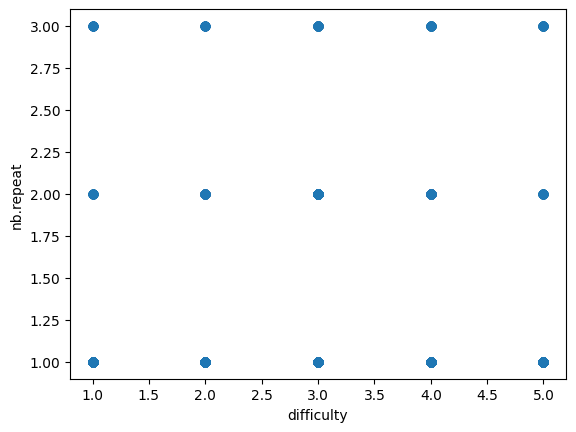

In [44]:
plt.scatter(df['difficulty'], df['nb.repeat'])
plt.xlabel('difficulty')
plt.ylabel('nb.repeat')
plt.show()

In [32]:
df['nb.repeat'].value_counts()
df['nb.repeat'].unique()

array([1, 3, 2], dtype=int64)

In [36]:
df['difficulty'].unique()


array([4, 3, 1, 2, 5], dtype=int64)

In [37]:
df['class'].unique()

array([ 2,  7, 10,  1,  6, 11, 13,  3,  4,  5,  8,  9, 12], dtype=int64)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)
X_train = training_set.iloc[:, [0,1]].values
Y_train = training_set.iloc[:, 2].values
X_test = test_set.iloc[:, [0,1]].values
Y_test = test_set.iloc[:, 2].values
classifier = SVC(kernel='linear', random_state=3)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score = classifier.score(X_test, Y_test)
print(accuracy_score*100)

[[639   0   0]
 [ 98   0   0]
 [ 59   0   0]]
80.27638190954774
